# Haystacks processing

### Load file and dependencies

In [1]:
from astropy.io import fits
import numpy as np

# import plotting library & parameters
%pylab inline --no-import-all
import seaborn as sns # plotting package, not necessary for Haystacks
sns.set(font_scale=2)
sns.set_style('whitegrid')


Populating the interactive namespace from numpy and matplotlib


In [2]:
haystacks_file = '/Users/mrizzo/Science/cube_zodi1inc0dist10_0.6um.fits'
haystacks = fits.open(haystacks_file)

### The image data is in extension 0

In [3]:
cube = haystacks[0].data
cubehdr = haystacks[0].header
cubehdr

SIMPLE  =                    T / Written by IDL:  Thu Apr  6 17:47:42 2017      
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    3 / Number of data axes                            
NAXIS1  =                 1201 /                                                
NAXIS2  =                 1201 /                                                
NAXIS3  =                  101 /                                                
EXTEND  =                    T / FITS data may contain extensions               
DATE    = '2017-04-06'         / Creation UTC (CCCC-MM-DD) date of FITS header  
SUN     =                    T / Sun in central pixel                           
LOCAL   =                    T / Local zodiacal background added                
COMMENT Spectral image cube of the Solar System.                                
COMMENT FITS (Flexible Image Transport System) format is defined in 'Astronomy  
COMMENT and Astrophysics', v

### Wavelengths are in extension 1


In [4]:
wavlist = haystacks[1].data
print (wavlist)

[ 0.60000002  0.60600001  0.61200005  0.61800003  0.62400001  0.63
  0.63600004  0.64200002  0.648       0.65400004  0.66000003  0.66600001
  0.67200005  0.67800003  0.68400002  0.69000006  0.69600004  0.70200002
  0.708       0.71400005  0.72000003  0.72600001  0.73199999  0.73800004
  0.74400002  0.75        0.75600004  0.76200002  0.76800001  0.77400005
  0.78000003  0.78600001  0.79200006  0.79800004  0.80400002  0.81000006
  0.81600004  0.82200003  0.82800001  0.83399999  0.84000003  0.84600002
  0.852       0.85800004  0.86400002  0.87        0.87600005  0.88200003
  0.88800001  0.89400005  0.90000004  0.90600002  0.91200006  0.91799998
  0.92400002  0.93000007  0.93599999  0.94200003  0.94800001  0.954
  0.96000004  0.96600002  0.972       0.97800004  0.98400003  0.99000001
  0.99600005  1.00200009  1.00800002  1.01400006  1.01999998  1.02600002
  1.03200006  1.03799999  1.04400003  1.05000007  1.05599999  1.06200004
  1.06800008  1.074       1.08000004  1.08599997  1.09200001  

### Stellar flux is in extension 2

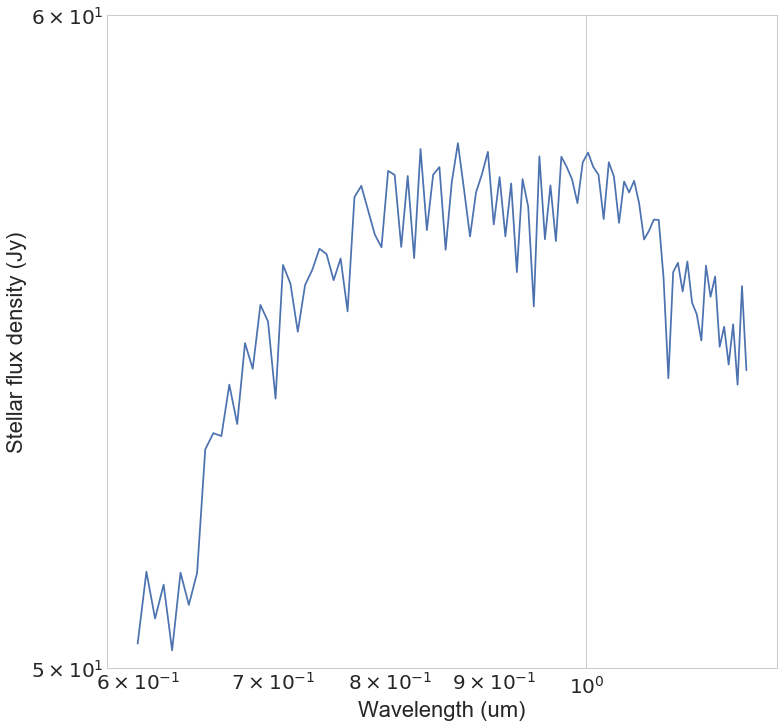

In [5]:
stellar = haystacks[2].data
plt.figure(figsize=(12,12))
plt.loglog(wavlist,stellar)
axes = plt.gca()
axes.set_ylim([50,60])
plt.xlabel('Wavelength (um)')
plt.ylabel('Stellar flux density (Jy)')


### Planet albedos are in extension 3


Number of planets is:  7


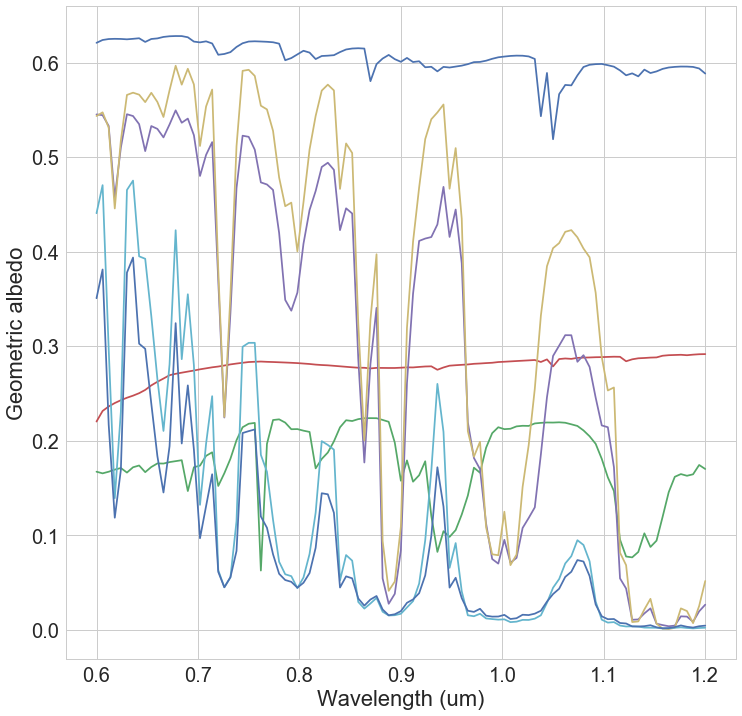

In [6]:
planets = haystacks[3].data
print "Number of planets is: ",planets.shape[0]
plt.figure(figsize=(12,12))
for p in range(planets.shape[0]):
    plt.plot(wavlist,planets[p])
plt.xlabel('Wavelength (um)')
plt.ylabel('Geometric albedo')


### Planet parameters are in extension 4


In [7]:
params = haystacks[4].data
# lists of parameters for all planets
# parameters are normalized with GM = 4pi**2
radii = params[0,:] # planet radius in AU
a = params[1,:]     # semi major axis in AU
ecc = params[2,:]     # Eccentricity
inc = params[3,:]     # inclination (radians)
longperi = params[4,:]     # Longitude of perihelion (radians)
longnode = params[5,:]     # Longitude of ascending node (radians)
meanlong = params[6,:]     # Mean longitude (radians)
argperi = params[7,:]      # Argument of perihelion (radians) (=meanlong-longperi)
periods = params[8,:]      # Orbital periods (years) (=a**1.5, where a is in AU; 1AU -> 1 year)
meananom = params[9,:]     # Mean anomaly (radians) (=argperi+2*pi*epoch/periods)
X = params[10,:]     # X coordinate of planet (in AU in the 3D scene)
Y = params[11,:]     # Y coordinate of planet (in AU in the 3D scene)
Z = params[12,:]     # Z coordinate of planet (in AU in the 3D scene)
Xpix = params[13,:]     # X location in cube (second dimension in Python arrays)
Ypix = params[14,:]     # Y location in cube (first dimension in Python arrays)
print("Coordinates of planets")
print(Xpix,Ypix)


Coordinates of planets
(array([ 597.,  610.,  590.,  591.,  693.,  702.,  900.]), array([ 606.,  600.,  588.,  651.,  572.,  766.,  600.]))


### Extract planet observed spectra

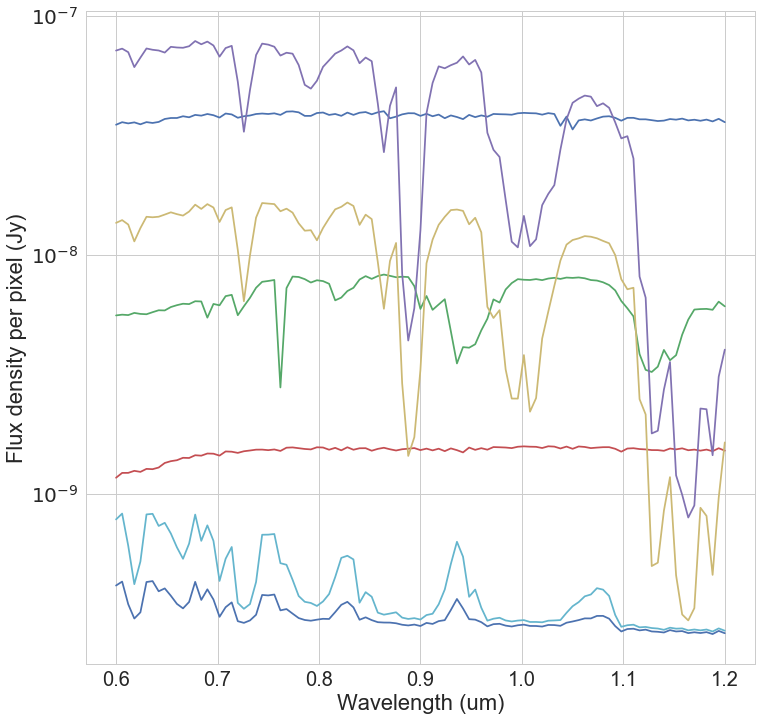

In [8]:
plt.figure(figsize=(12,12))
for p in range(planets.shape[0]):
    plt.semilogy(wavlist,cube[:,int(Ypix[p]),int(Xpix[p])])
plt.xlabel('Wavelength (um)')
plt.ylabel('Flux density per pixel (Jy)')
